# 소프트맥스 회귀: Softmax Regression
* 3개 이상의 선택지 중에서 1개를 고르는 다중 클래스 분류 문제를 위한 소프트맥스 회귀(Softmax Regression)입니다.

## 1. 다중 클래스 분류: Multi-class Classification
* 이진 분류가 두 개의 선택지 중 하나를 고르는 문제였다면, 세 개 이상의 선택지 중 하나를 고르는 문제를 다중 클래스 분류라고 합니다. 
* 아래의 붓꽃 품종 예측 데이터는 꽃받침 길이, 꽃받침 넓이, 꽃잎 길이, 꽃잎 넓이로부터 setosa, versicolor, virginica라는 3개의 품종 중 어떤 품종인지를 예측하는 문제를 위한 데이터로 전형적인 다중 클래스 분류 문제를 위한 데이터입니다.

    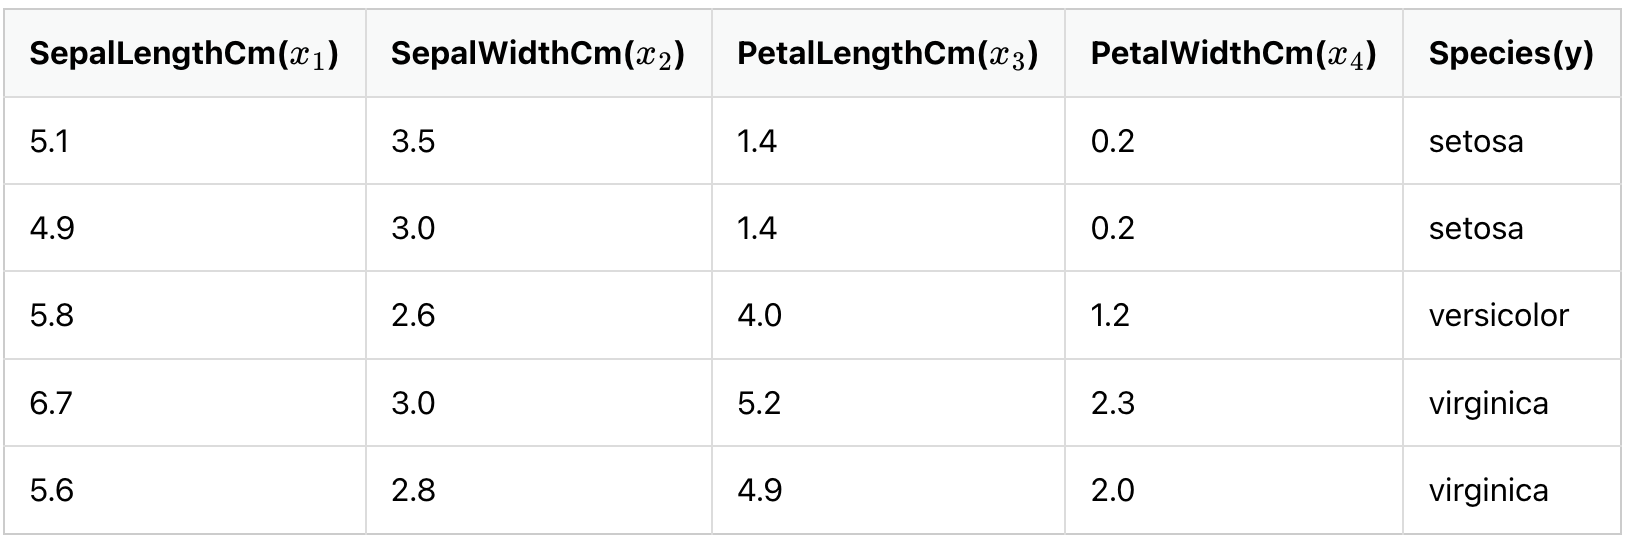

## 2. 소프트맥스 함수: Softmax function
* 소프트맥스 함수는 선택해야 하는 선택지의 총 개수를 k라고 할 때, k차원의 벡터를 입력받아 각 클래스에 대한 확률을 추정합니다. 
* 시그모이드 함수의 일반형으로, 모든 클래스에 대한 확률을 추정하고 더했을 때 1이 되도록 하는 함수입니다.
### 1. 소프트맥스 함수의 이해
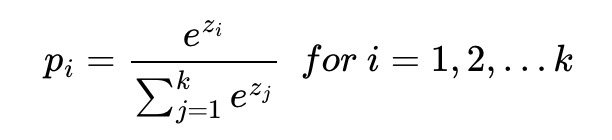
* 여기서는 i가 1일 때는 virginica일 확률을 나타내고, 2일 때는 setosa일 확률, 3일때는 versicolor일 확률이라고 지정하였다고 합시다.

    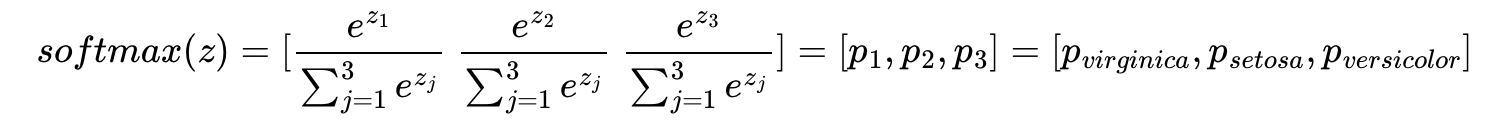
### 2. 그림을 통한 이해
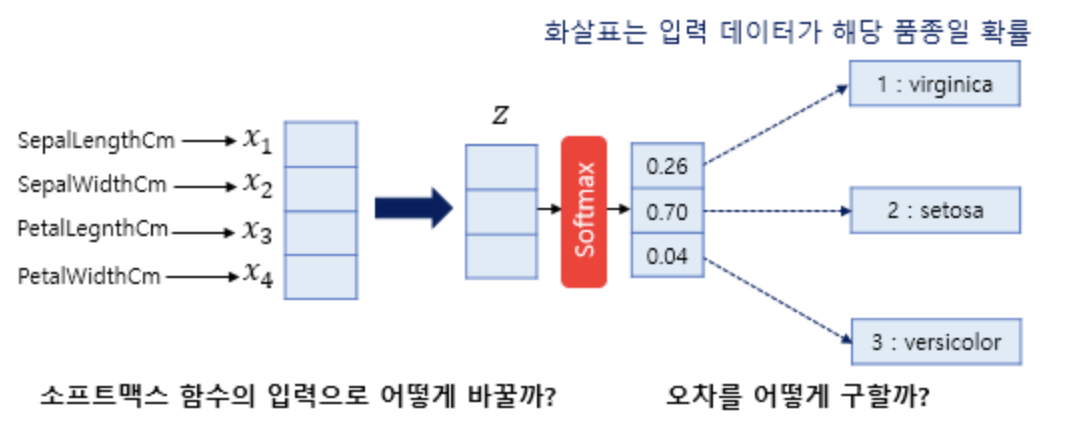
* 위의 그림에는 두 가지 의문이 있습니다. 첫번째 질문은 소프트맥스 함수의 입력에 대한 의문입니다.
* 소프트맥스 함수의 입력 벡터 z의 차원수만큼 결과값이 나오도록 가중치 곱을 진행합니다. 위의 그림에서 화살표는 총 (4 × 3 = 12) 12개이며 전부 다른 가중치를 가지고, 학습 과정에서 점차적으로 오차를 최소화하는 가중치로 값이 변경됩니다.

    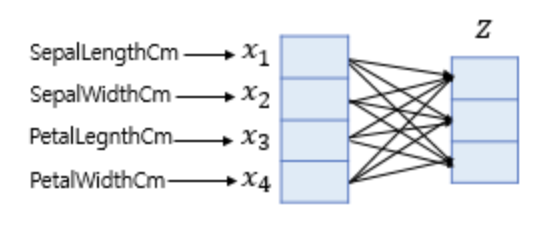
* 두번째 질문은 오차 계산 방법에 대한 의문입니다. 예측값과 비교를 할 수 있는 실제값의 표현 방법이 있어야 합니다. 소프트맥스 회귀에서는 실제값을 원-핫 벡터로 표현합니다.

    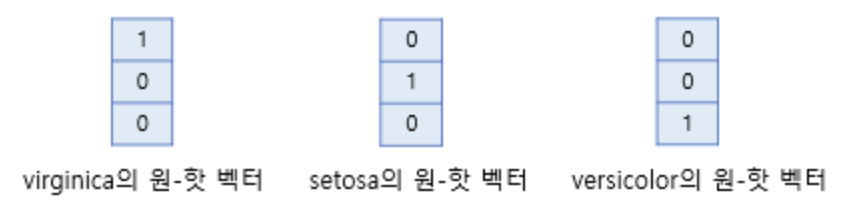
    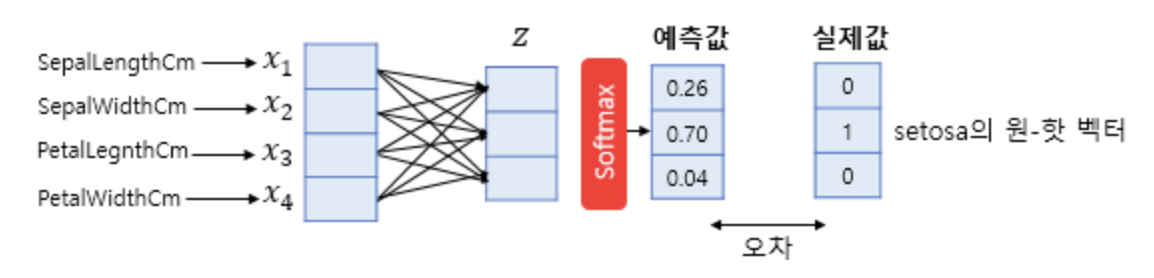
    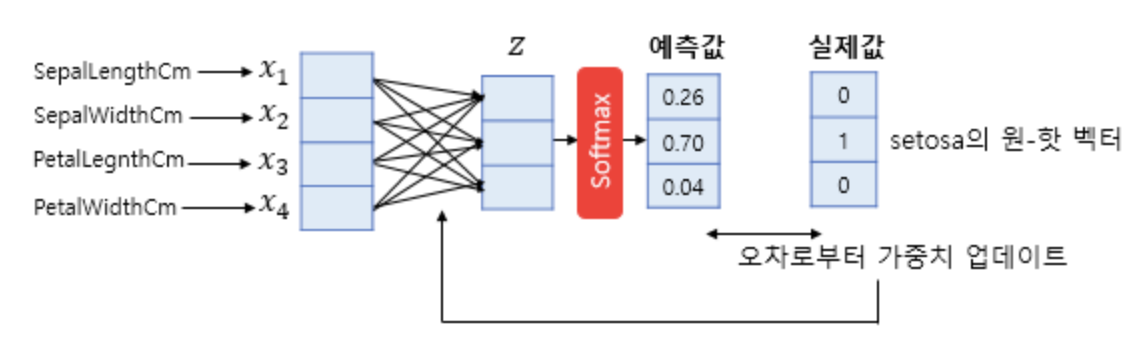
    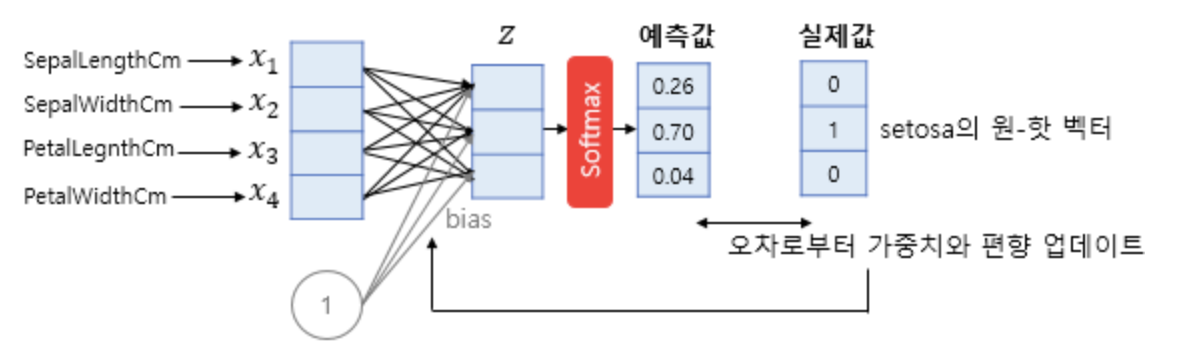
* 소프트맥스 회귀에서 예측값을 구하는 과정을 벡터와 행렬 연산으로 표현하면 아래와 같습니다. 여기서 4는 특성의 수이며 3은 클래스의 개수에 해당됩니다.

    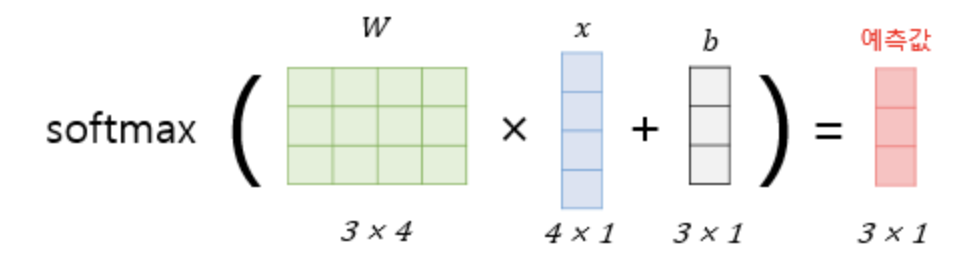

## 3. 원-핫 벡터의 무작위성
* 꼭 실제값을 원-핫 벡터로 표현해야만 다중 클래스 분류 문제를 풀 수 있는 것은 아니지만, 대부분의 다중 클래스 분류 문제가 각 클래스 간의 관계가 균등하다는 점에서 원-핫 벡터는 이러한 점을 표현할 수 있는 적절한 표현 방법입니다.
* 그런데 일반적인 다중 클래스 분류 문제에서 레이블링 방법으로는 위와 같은 정수 인코딩이 아니라 원-핫 인코딩을 사용하는 것이 보다 클래스의 성질을 잘 표현하였다고 할 수 있습니다. 그 이유를 알아봅시다.

    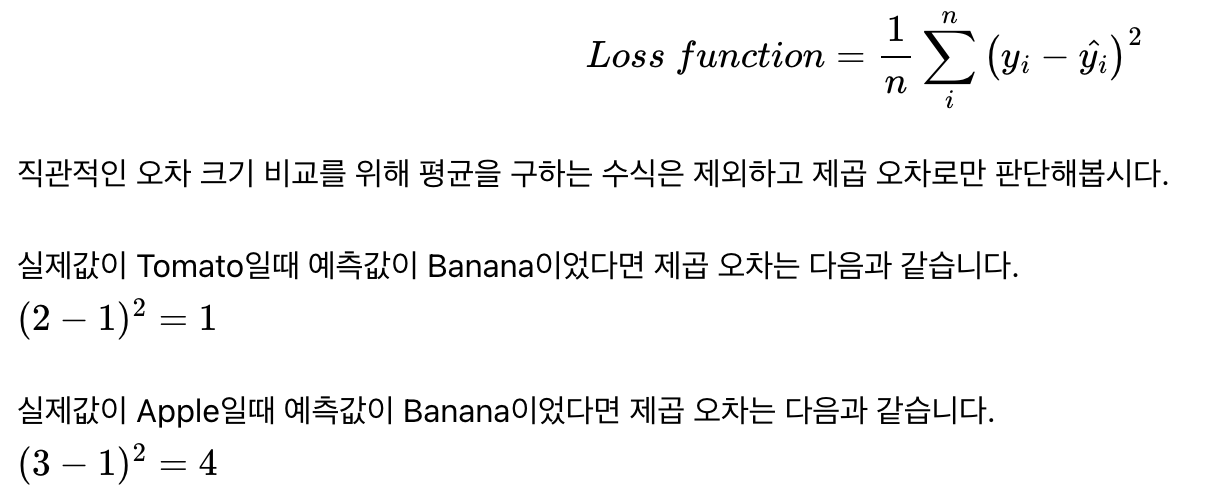
* 즉, Banana과 Tomato 사이의 오차보다 Banana과 Apple의 오차가 더 큽니다. 이는 기계에게 Banana가 Apple보다는 Tomato에 더 가깝다는 정보를 주는 것과 다름없습니다. 
* 이러한 정수 인코딩의 순서 정보가 도움이 되는 분류 문제도 물론 있습니다. 바로 각 클래스가 순서의 의미를 갖고 있어서 회귀를 통해서 분류 문제를 풀 수 있는 경우입니다. 
* 예를 들어 {baby, child, adolescent, adult}나 {1층, 2층, 3층, 4층}이나 {10대, 20대, 30대, 40대}와 같은 경우가 이에 해당됩니다. 
* 하지만 일반적인 분류 문제에서는 각 클래스는 순서의 의미를 갖고 있지 않으므로 각 클래스 간의 오차는 균등한 것이 옳습니다. 
* 정수 인코딩과 달리 원-핫 인코딩은 분류 문제 모든 클래스 간의 관계를 균등하게 분배합니다.

    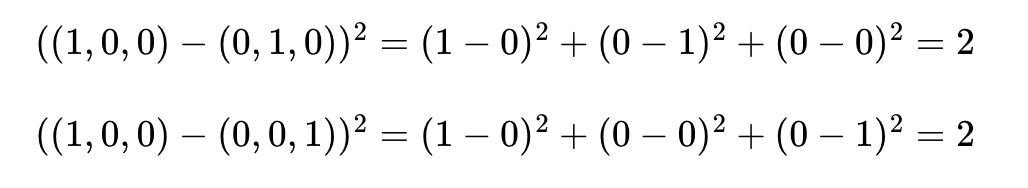
* 원-핫 벡터는 이처럼 각 클래스의 표현 방법이 무작위성을 가진다는 점을 표현할 수 있습니다. 
* 하지만 이러한 원-핫 벡터의 관계의 무작위성은 때로는 단어의 유사성을 구할 수 없다는 단점으로 언급되기도 합니다.

## 4. 비용 함수: Cost function
* 소프트맥스 회귀에서는 비용 함수로 크로스 엔트로피 함수를 사용합니다.
### 1. 크로스 엔트로피 함수
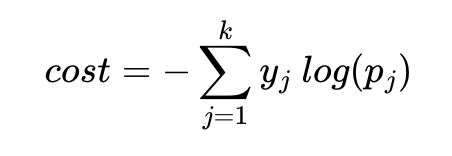
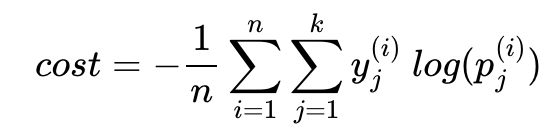
* 이 함수가 왜 비용 함수로 적합한지 알아보겠습니다. c가 실제값 원-핫 벡터에서 1을 가진 원소의 인덱스라고 한다면, p_c은 y_hat가 y를 정확하게 예측한 경우가 됩니다. 
* 이를 식에 대입해보면 -1log(1) = 0이 되기 때문에, 결과적으로 y_hat가 y를 정확하게 예측한 경우의 크로스 엔트로피 함수의 값은 0이 됩니다. 즉, cost이 값을 최소화하는 방향으로 학습해야 합니다.
### 2. 이진 분류에서의 크로스 엔트로피 함수
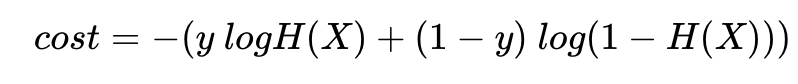
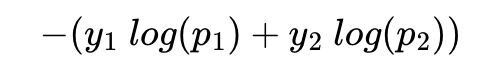
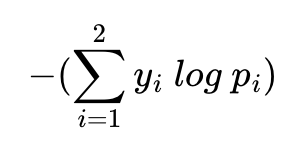
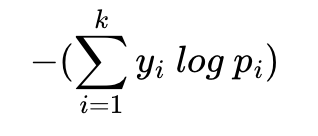
* 위 식은 결과적으로 소프트맥스 회귀의 식과 동일합니다.
* 정리하면 소프트맥스 함수의 최종 비용 함수에서 k가 2라고 가정하면 결국 로지스틱 회귀의 비용 함수와 같습니다.

    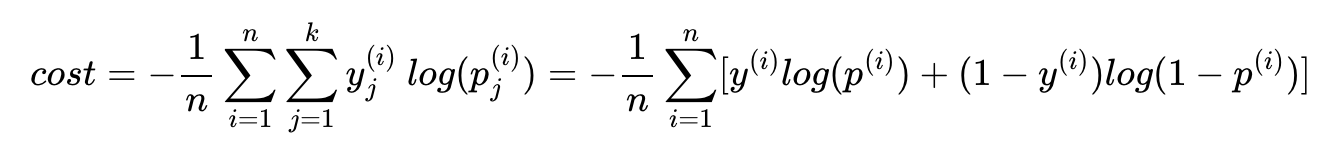

## 5. 인공 신경망 다이어그램
* n개의 특성을 가지고 m개의 클래스를 분류하는 소프트맥스 회귀를 뒤에서 배우게 되는 인공 신경망의 형태로 표현하면 다음과 같습니다. 
* 소프트맥스 회귀 또한 하나의 인공 신경망으로 볼 수 있습니다.

    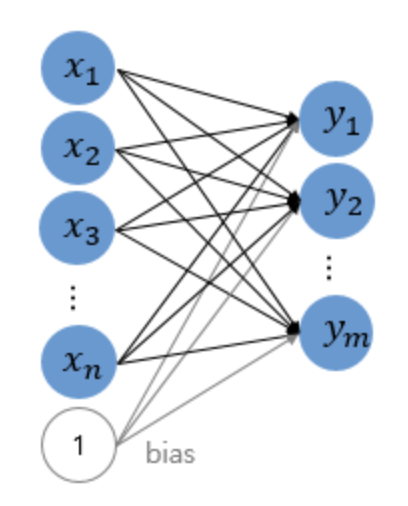